#Credit Card Fraud Detection


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import preprocessing packages
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Import classification packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, auc

## 1.Data discovery

In [10]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/1.ML_projects/Credit_fraud/creditcard.csv')

# Do something with the dataframe
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head(5))
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print("-------------------------------Describe----------------------------------")
    print(df.describe())
    print("-------------------------------Columns-----------------------------------")
    print(df.columns)
    print("-------------------------------Data Types--------------------------------")
    print(df.dtypes)
    print("----------------------------Missing Values-------------------------------")
    print(df.isnull().sum())
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)
    print("============================================================================ \n")

In [12]:
basic_eda(df)

-------------------------------TOP 5 RECORDS-----------------------------
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0

In [13]:
fraud_proportions = df['Class'].value_counts() / len(df) * 100
print(fraud_proportions)

0    99.827251
1     0.172749
Name: Class, dtype: float64


General information 

*   We only know the variables transaction and amout due to privacy
*   Class represent fraud y/n
*   The other columns have been scaled

About the dataset


*   No null values
*   Unbalanced dataset : only 0.17% of fraud registered

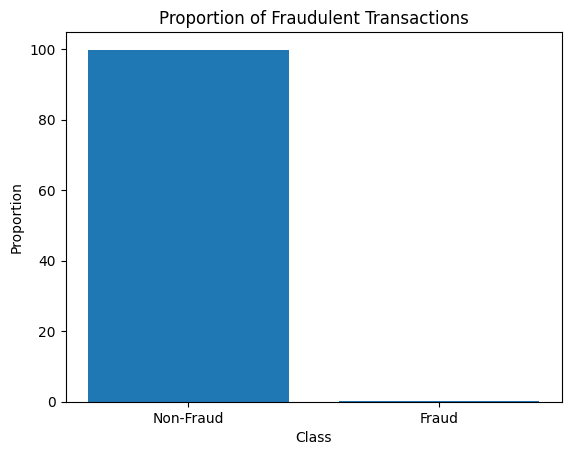

In [14]:
# Plot the distribution of fraudulent trasactions
plt.bar(fraud_proportions.index, fraud_proportions.values)
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Proportion of Fraudulent Transactions')
plt.xticks(fraud_proportions.index, ['Non-Fraud', 'Fraud'])
plt.show()

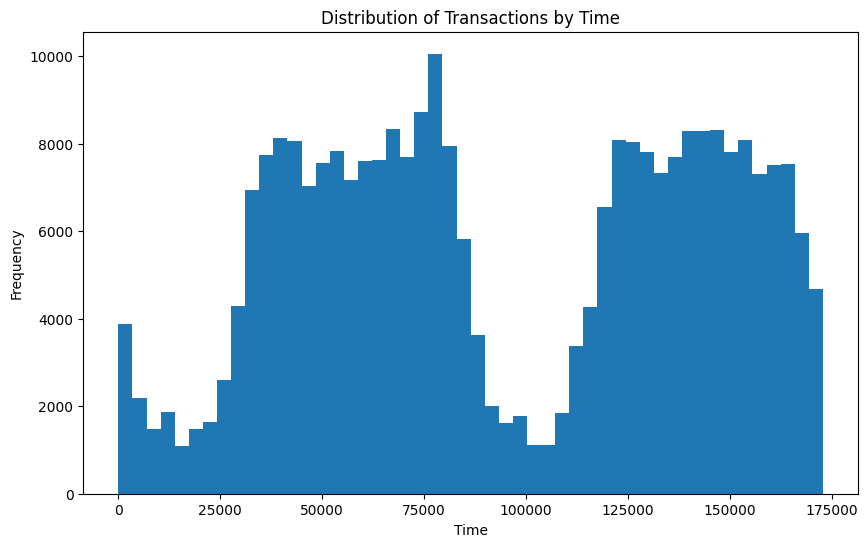

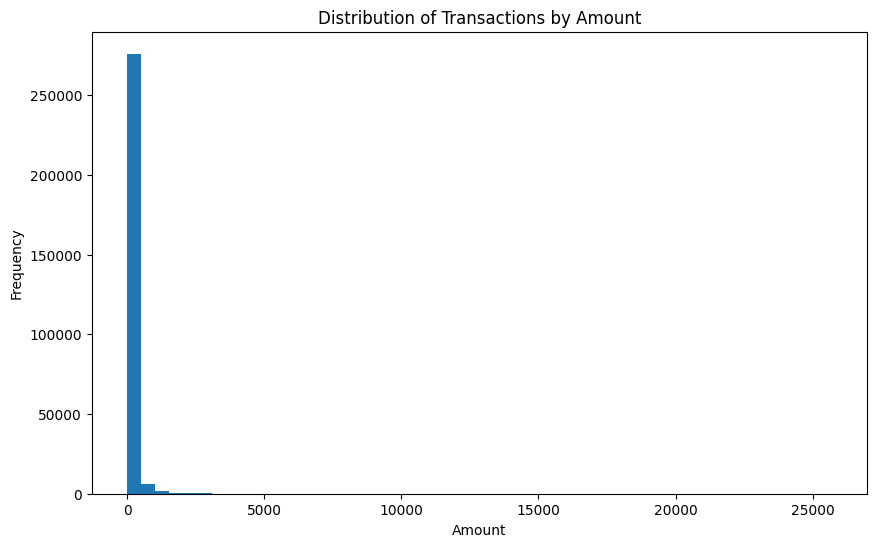

In [15]:
# Plot the distribution of transactions by time
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=50)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions by Time')
plt.show()

# Plot the distribution of transactions by amount
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions by Amount')
plt.show()

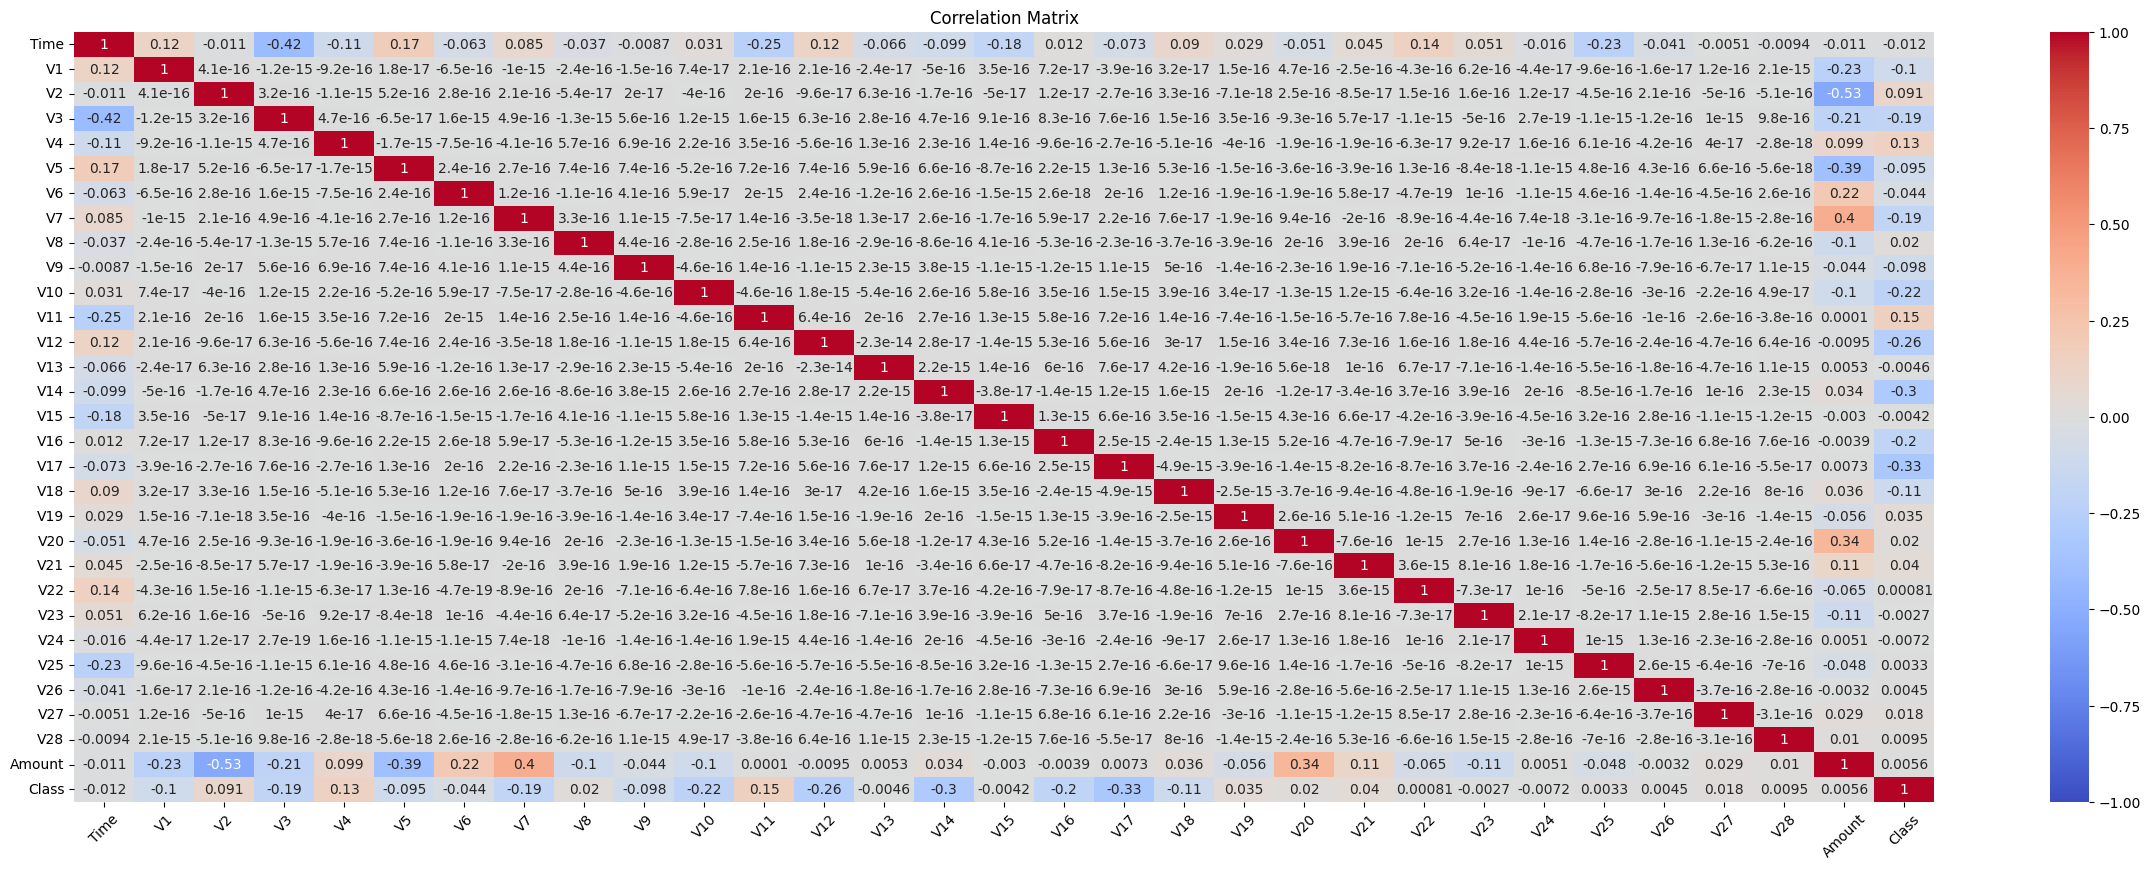

In [16]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()


## 2.Data preparation

'Time' and 'Amount' features are not scaled like the rest of the features so we will handle this

In [17]:
# Scale the "Time" and "Amount" columns
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original "Time" and "Amount" columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [18]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1) #Feature Matrix
y = df['Class'] #Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Label distribution in train and test set
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.998271
1    0.001729
Name: Class, dtype: float64
0    0.99828
1    0.00172
Name: Class, dtype: float64


## 3.Oversampling and model selection

###3.1.Random oversampling

In [19]:
#Random over sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#Label distribution after over sampling
print(y_resampled.value_counts()/len(y_resampled))

0    0.5
1    0.5
Name: Class, dtype: float64


####3.1.1.Model comparison

In [ ]:
# Some basic classification algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) # Logistic regression
models.append(('LDA', LinearDiscriminantAnalysis())) # Linear discriminant analysis
models.append(('KNN', KNeighborsClassifier())) # K-nearest neighbors
models.append(('CART', DecisionTreeClassifier())) # Decision tree
models.append(('NB', GaussianNB())) # Gaussian Naïve Bayes

# Ensemble models 
models.append(('AB', AdaBoostClassifier())) # Adaptative Boosting
models.append(('GBM', GradientBoostingClassifier())) # Gradient Boosting
models.append(('XGB', XGBClassifier())) # XGBoost

# Bagging methods
models.append(('RF', RandomForestClassifier())) # Random forest
models.append(('ET', ExtraTreesClassifier())) # Extra trees

LR : 0.946394 (0.000474)
LDA : 0.918381 (0.000603)
KNN : 0.999613 (0.000083)
CART : 0.999730 (0.000055)
NB : 0.914847 (0.000647)
AB : 0.972871 (0.001669)
GBM : 0.994546 (0.000744)
XGB : 0.999919 (0.000044)
RF : 0.999949 (0.000030)
ET : 0.999960 (0.000026)


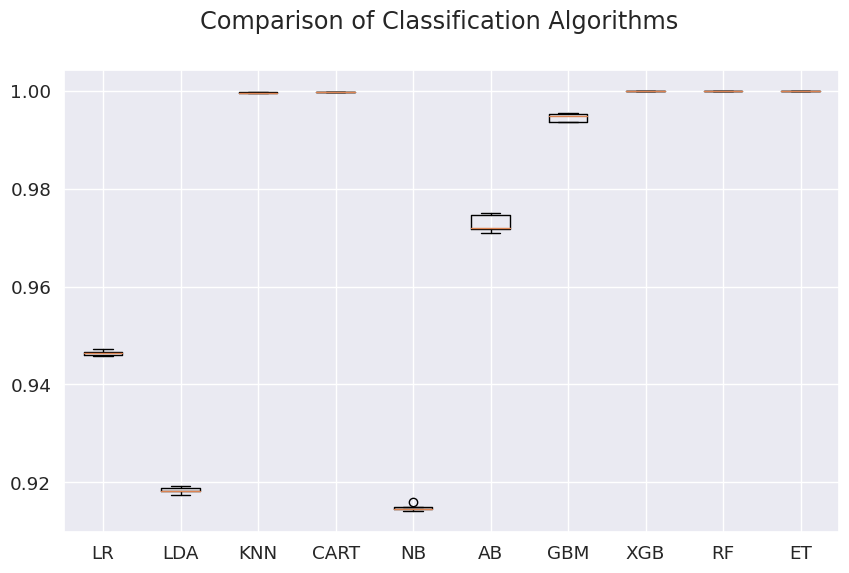

In [ ]:
# Test these learning classifier models in terms of F1-score
scoring = 'f1_weighted'

# Test options for classification
num_folds = 5
seed = 42

# Test different models of classification
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Display the name of the model, the mean and standard deviation of the cross-validation results
    print(msg)

# Compare the algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 3.1.2 Model selection

F1-Score : 0.8587570621468926


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



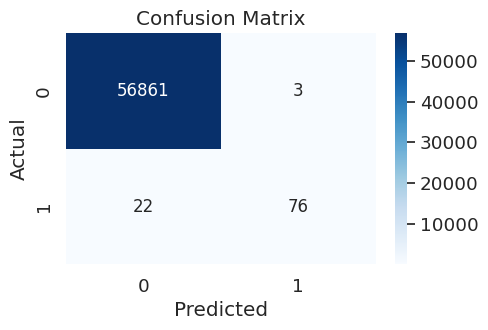

In [ ]:
# Prepare extra trees model
model = ExtraTreesClassifier()
model.fit(X_resampled, y_resampled)

# Estimate F1-score on validation set
predictions = model.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

F1-Score : 0.8852459016393441


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



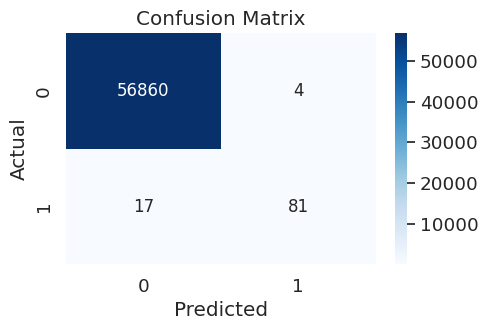

In [ ]:
# Prepare XG Boost model
model_2 = XGBClassifier()
model_2.fit(X_resampled, y_resampled)

# Estimate F1-score on validation set
predictions = model_2.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

F1-Score : 0.7813953488372092


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



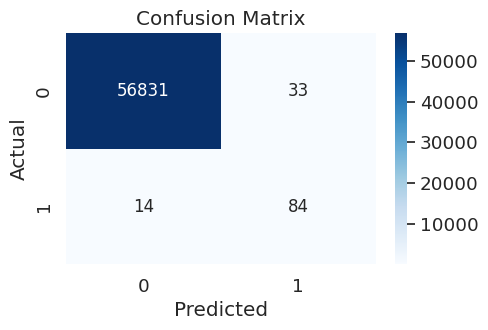

In [ ]:
# Prepare extra trees model
model_3 = KNeighborsClassifier()
model_3.fit(X_resampled, y_resampled)

# Estimate F1-score on validation set
predictions = model_3.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.2.SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X_train, y_train)

#Label distribution after over sampling
print(y_resampled_SMOTE.value_counts()/len(y_resampled_SMOTE))

0    0.5
1    0.5
Name: Class, dtype: float64


####3.2.1.Model comparison

LR : 0.949042 (0.000470)
LDA : 0.918768 (0.000686)
KNN : 0.998984 (0.000084)
CART : 0.998246 (0.000196)
NB : 0.912572 (0.000460)
AB : 0.963228 (0.001208)
GBM : 0.979189 (0.000484)
XGB : 0.999732 (0.000094)
RF : 0.999870 (0.000053)
ET : 0.999912 (0.000041)


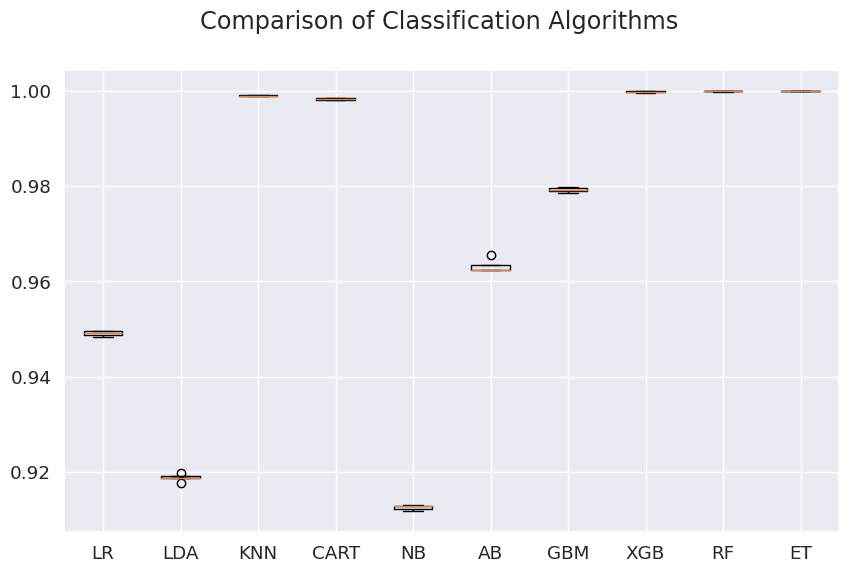

In [ ]:
# Test these learning classifier models in terms of F1-score
scoring = 'f1_weighted'

# Test options for classification
num_folds = 5
seed = 42

# Test different models of classification
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_resampled_SMOTE, y_resampled_SMOTE, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Display the name of the model, the mean and standard deviation of the cross-validation results
    print(msg)

# Compare the algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####3.2.2.Model selection

F1-Score : 0.8695652173913043


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



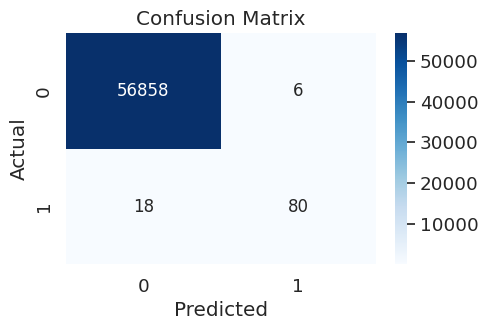

In [ ]:
# Prepare extra trees model
model_4 = ExtraTreesClassifier()
model_4.fit(X_resampled_SMOTE, y_resampled_SMOTE)

# Estimate F1-score on validation set
predictions = model_4.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

F1-Score : 0.8133971291866028


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



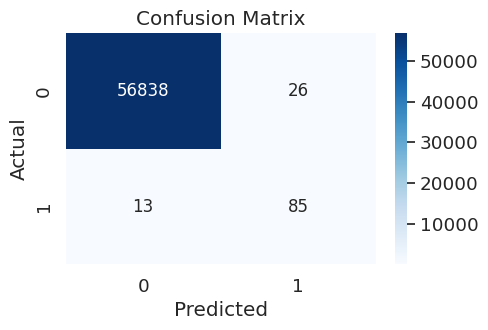

In [ ]:
# Prepare extra trees model
model_5 = XGBClassifier()
model_5.fit(X_resampled_SMOTE, y_resampled_SMOTE)

# Estimate F1-score on validation set
predictions = model_5.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

F1-Score : 0.6204379562043796


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.87      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



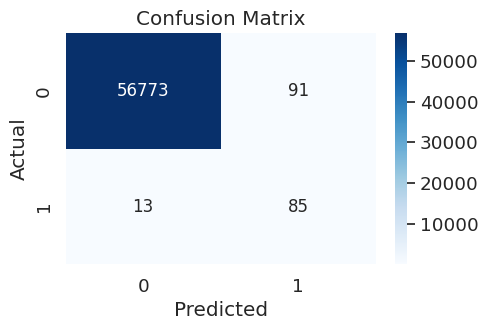

In [ ]:
# Prepare extra trees model
model_6 = KNeighborsClassifier()
model_6.fit(X_resampled_SMOTE, y_resampled_SMOTE)

# Estimate F1-score on validation set
predictions = model_6.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 4.Final model selection + fine tuning 

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

def xgb_cv(n_estimators, max_depth, learning_rate, subsample, data, targets):
    estimator = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        eval_metric='logloss',
        random_state=42
    )
    cval = cross_val_score(estimator, data, targets, scoring='f1', cv=5)
    return cval.mean()

def optimize_xgb(data, targets):
    def xgb_crossval(n_estimators, max_depth, learning_rate, subsample):
        return xgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            learning_rate=learning_rate,
            subsample=subsample,
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=xgb_crossval,
        pbounds={
            "n_estimators": (100, 500),
            "max_depth": (3, 7),
            "learning_rate": (0.01, 0.2),
            "subsample": (0.5, 1.0),
        },
        random_state=42,
        verbose=2
    )
    optimizer.maximize(n_iter=15)

    print("Final result:", optimizer.max)

    # Train model with best parameters
    best_params = optimizer.max['params']
    best_model = XGBClassifier(
        n_estimators=int(best_params['n_estimators']),
        max_depth=int(best_params['max_depth']),
        learning_rate=best_params['learning_rate'],
        subsample=best_params['subsample'],
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    best_model.fit(data, targets)

    # Predict and compute F1-score on the validation set
    predictions = best_model.predict(X_test)
    f1 = f1_score(y_test, predictions)

    print("F1-score on validation set: ", f1)

optimize_xgb(X_resampled, y_resampled)


|   iter    |  target   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------
| 1         | 0.9999    | 0.08116   | 6.803     | 392.8     | 0.7993    |
| 2         | 0.9721    | 0.03964   | 3.624     | 123.2     | 0.9331    |
| 3         | 0.9997    | 0.1242    | 5.832     | 108.2     | 0.985     |
| 4         | 0.9995    | 0.1682    | 3.849     | 172.7     | 0.5917    |
| 5         | 0.9999    | 0.06781   | 5.099     | 272.8     | 0.6456    |
| 6         | 0.9999    | 0.1475    | 4.98      | 272.8     | 0.7052    |
| 7         | 0.9998    | 0.1519    | 3.072     | 257.5     | 0.7782    |
| 8         | 0.9999    | 0.09912   | 5.199     | 409.2     | 0.9835    |
| 9         | 0.9999    | 0.1838    | 3.102     | 290.5     | 0.7835    |
| 10        | 0.9999    | 0.1421    | 5.81      | 308.1     | 0.8708    |
| 11        | 0.9999    | 0.1787    | 3.059     | 325.6     | 0.6128    |
| 12        | 0.9999    | 0.1568    | 

F1-Score : 0.8961748633879782


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



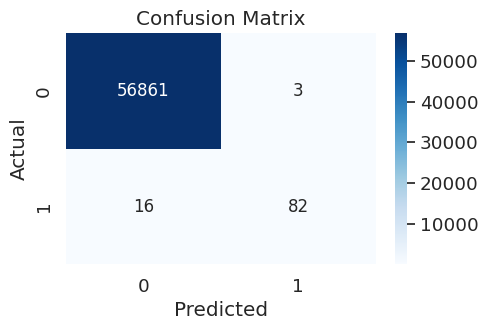

In [20]:
# Prepare XG Boost model
model_2 = XGBClassifier(
        n_estimators=int(361.5),
        max_depth=int(6.389),
        learning_rate=0.191,
        subsample=0.7303,
        eval_metric='logloss',
        random_state=42
)
model_2.fit(X_resampled, y_resampled)

# Estimate F1-score on validation set
predictions = model_2.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

F1-Score : 0.8950276243093923


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



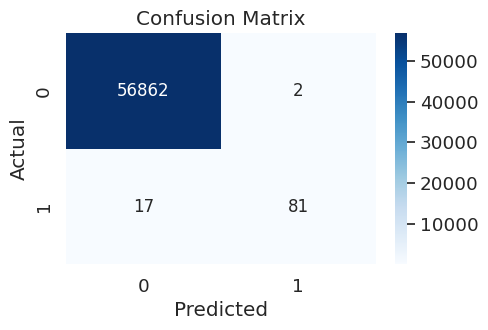

In [21]:
# Prepare XG Boost model
model_2 = XGBClassifier(
        n_estimators=int(343.2),
        max_depth=int(6.207),
        learning_rate=0.1568,
        subsample=0.7467,
        eval_metric='logloss',
        random_state=42
)
model_2.fit(X_resampled, y_resampled)

# Estimate F1-score on validation set
predictions = model_2.predict(X_test)

print(f"F1-Score : {f1_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))

# Create a heatmap with seaborn
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)  # Adjust the font scale for better visibility
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size": 12}, cmap="Blues", fmt="d")  # Use a blue color map
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()